<a href="https://colab.research.google.com/github/Ebonica/SYNC-INTERN-S-MACHINE-LEARNING-/blob/main/BOSTON_HOUSE_PRICE_PREDICTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving boston.csv to boston.csv


In [ ]:
data = pd.read_csv('boston.csv')

**DATA ANALYSIS**

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
nan_rows = data[data.isna().any(axis=1)]

In [25]:
print("Rows containing NaN values:")
print(nan_rows)


data.dropna(inplace=True)


data.to_csv("updated_dataset.csv", index= True)

Rows containing NaN values:
Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV]
Index: []


In [ ]:
data_cleaned = data.dropna(how='all')
data.to_csv("updated_dataset.csv", index=False)

In [21]:
data_cleaned

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [ ]:
print(data_cleaned.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
print(data_cleaned.tail())

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  


In [ ]:
print(data_cleaned.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [ ]:
print(data_cleaned.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [ ]:
print(data_cleaned.shape)

(506, 14)


In [ ]:
print(data_cleaned.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [ ]:
data_cleaned.iloc[8]

CRIM         0.21124
ZN          12.50000
INDUS        7.87000
CHAS         0.00000
NOX          0.52400
RM           5.63100
AGE        100.00000
DIS          6.08210
RAD          5.00000
TAX        311.00000
PTRATIO     15.20000
B          386.63000
LSTAT       29.93000
MEDV        16.50000
Name: 8, dtype: float64

In [ ]:

columns_of_interest = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']


unique_values = data_cleaned[columns_of_interest].nunique()


count_unique_values = data_cleaned[columns_of_interest].apply(lambda x: x.nunique())

value_counts = data_cleaned[columns_of_interest].apply(pd.Series.value_counts)

print("Unique Values:")
print(unique_values)
print("\nCount of Unique Values:")
print(count_unique_values)
print("\nValue Counts:")
print(value_counts)

Unique Values:
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

Count of Unique Values:
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

Value Counts:
           CRIM     ZN  INDUS   CHAS  NOX  RM  AGE  DIS  RAD    TAX  PTRATIO  \
0.00000     NaN  372.0    NaN  471.0  NaN NaN  NaN  NaN  NaN    NaN      NaN   
0.00632     1.0    NaN    NaN    NaN  NaN NaN  NaN  NaN  NaN    NaN      NaN   
0.00906     1.0    NaN    NaN    NaN  NaN NaN  NaN  NaN  NaN    NaN      NaN   
0.01096     1.0    NaN    NaN    NaN  NaN NaN  NaN  NaN  NaN    NaN      NaN   
0.01301     1.0    NaN    NaN    NaN  NaN NaN  NaN  NaN  NaN    NaN      NaN   
...         ...    

**DATA VISUALIZATION**

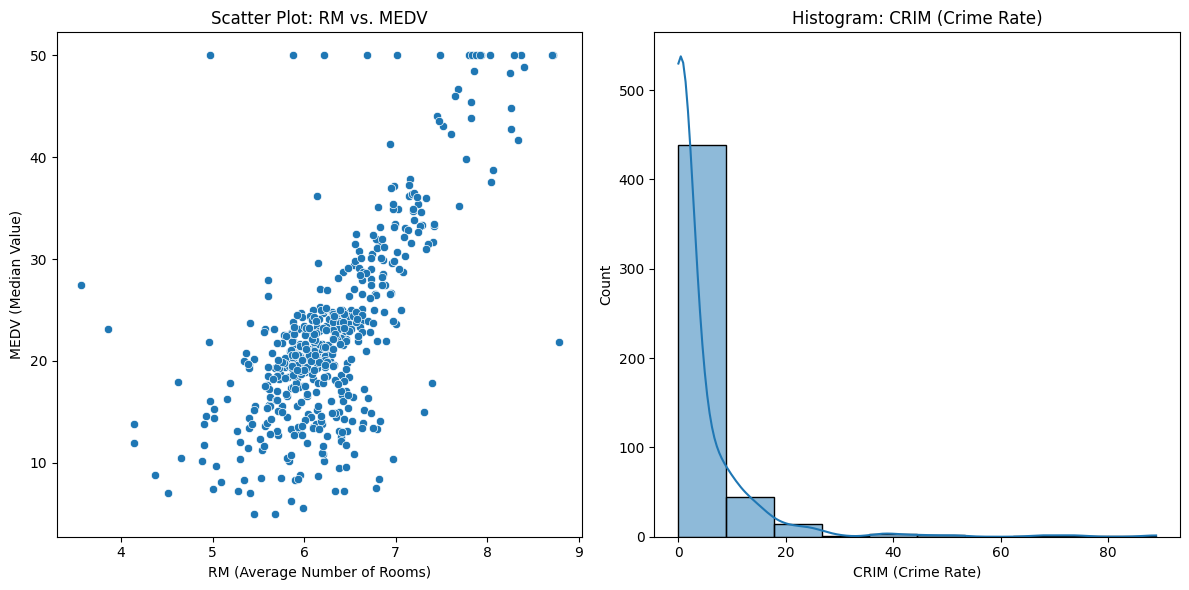

In [26]:

plt.figure(figsize=(12, 6))


plt.subplot(121)
sns.scatterplot(x='RM', y='MEDV', data=data_cleaned)
plt.title('Scatter Plot: RM vs. MEDV')
plt.xlabel('RM (Average Number of Rooms)')
plt.ylabel('MEDV (Median Value)')


plt.subplot(122)
sns.histplot(data_cleaned['CRIM'], bins=10, kde=True)
plt.title('Histogram: CRIM (Crime Rate)')
plt.xlabel('CRIM (Crime Rate)')

plt.tight_layout()
plt.show()

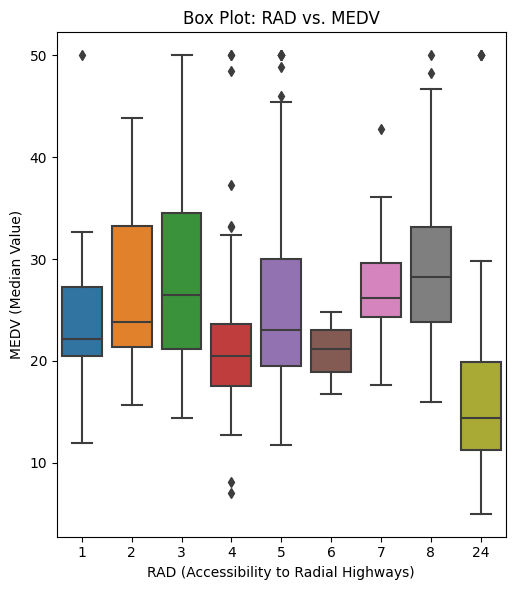

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(133)
sns.boxplot(x='RAD', y='MEDV', data=data_cleaned)
plt.title('Box Plot: RAD vs. MEDV')
plt.xlabel('RAD (Accessibility to Radial Highways)')
plt.ylabel('MEDV (Median Value)')

plt.tight_layout()
plt.show()

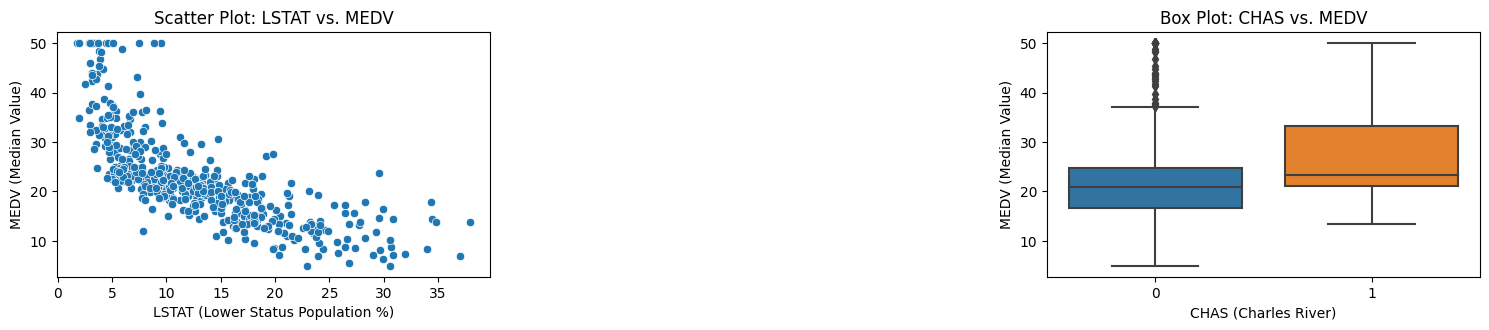

In [27]:
plt.figure(figsize=(15, 6))

plt.subplot(234)
sns.scatterplot(x='LSTAT', y='MEDV', data=data_cleaned)
plt.title('Scatter Plot: LSTAT vs. MEDV')
plt.xlabel('LSTAT (Lower Status Population %)')
plt.ylabel('MEDV (Median Value)')


plt.subplot(236)
sns.boxplot(x='CHAS', y='MEDV', data=data_cleaned)
plt.title('Box Plot: CHAS vs. MEDV')
plt.xlabel('CHAS (Charles River)')
plt.ylabel('MEDV (Median Value)')

plt.tight_layout()
plt.show()

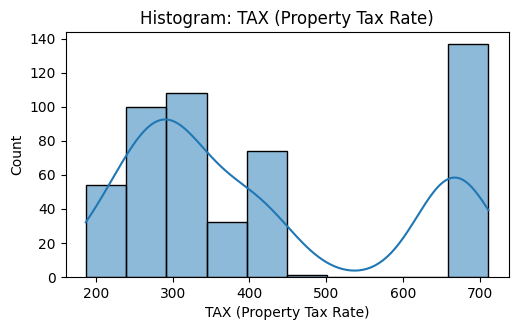

In [28]:
plt.figure(figsize=(15, 6))

plt.subplot(235)
sns.histplot(data_cleaned['TAX'], bins=10, kde=True)
plt.title('Histogram: TAX (Property Tax Rate)')
plt.xlabel('TAX (Property Tax Rate)')
plt.tight_layout()
plt.show()


**BOSTON HOUSE PREDICTION USING LINEAR REGRESSION**

In [29]:

X = data_cleaned.drop('MEDV', axis=1)
y = data_cleaned['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 24.29
R-squared: 0.67


     Actual  Predicted
173    23.6  28.996724
274    32.4  36.025565
491    13.6  14.816944
72     22.8  25.031979
452    16.1  18.769880


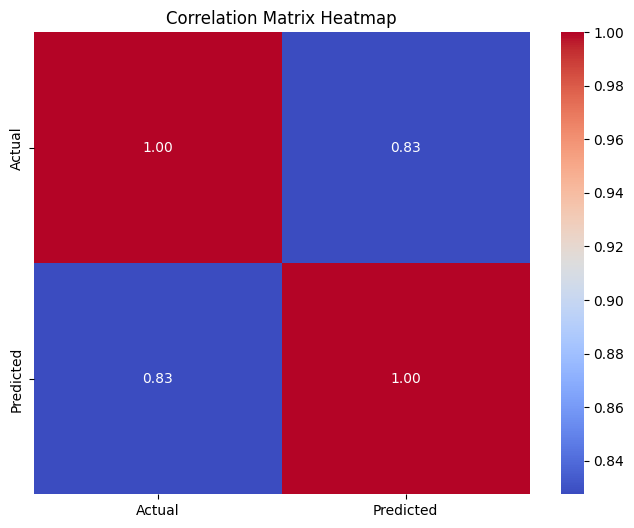

In [30]:
y_pred = model.predict(X_test)


results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


print(results.head())

correlation_matrix = results.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**BOSTON HOUSE PRICE PREDICTION USING RANDOM FOREST**

In [31]:
X = data_cleaned.drop('MEDV', axis=1)
y = data_cleaned['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


rf_regressor.fit(X_train, y_train)


pred = rf_regressor.predict(X_test)


mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


feature_importances = pd.Series(rf_regressor.feature_importances_, index=X.columns)
print("\nFeature Importances:")
print(feature_importances)

Mean Squared Error (MSE): 7.90
R-squared (R2): 0.89

Feature Importances:
CRIM       0.038062
ZN         0.001756
INDUS      0.007953
CHAS       0.001004
NOX        0.015544
RM         0.503845
AGE        0.013840
DIS        0.060549
RAD        0.003811
TAX        0.015661
PTRATIO    0.016313
B          0.012154
LSTAT      0.309509
dtype: float64


     Actual  Predicted
173    23.6  28.996724
274    32.4  36.025565
491    13.6  14.816944
72     22.8  25.031979
452    16.1  18.769880


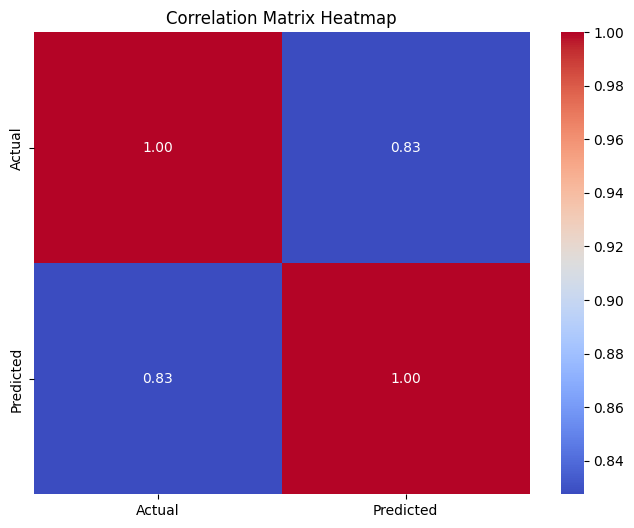

In [32]:
pred = model.predict(X_test)


results = pd.DataFrame({'Actual': y_test, 'Predicted': pred})


print(results.head())


correlation_matrix = results.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()